
#Employee Burnout Analysis

Employee burnout is a state of physical, emotional and mental exhaustion caused by excessive and prolonged stress. It can have serious consequences on an individual's well-being and can lead to decreased productivity and job performance. In today's fast-paced and constantly connected world, it is increasingly important to recognize and address the signs of burnout in order to maintain the health and well-being of employees.

we will be exploring the use of regression techniques to predict employee burnout. By analyzing a dataset containing various factors that may contribute to burnout such as workload, mental fatigue job and work-life balance, we can develop a model to identify individuals who may be at risk of burnout. By proactively addressing these risk factors, organizations can help prevent burnout and promote the well-being of their employees.

# Dataset: Are Your Employees Burning Out?

This dataset consists of 9 columns as follows:

| Column Name              | Description                                                                                 | Example                          |
|--------------------------|---------------------------------------------------------------------------------------------|----------------------------------|
| **Employee ID**          | The unique ID allocated for each employee.                                                 | `fife390032003000`              |
| **Date of Joining**      | The date-time when the employee joined the organization.                                    | `2008-12-30`                    |
| **Gender**               | The gender of the employee.                                                                | `Male/Female`                   |
| **Company Type**         | The type of company where the employee works.                                              | `Service/Product`               |
| **WFH Setup Available**  | Indicates if the work-from-home facility is available for the employee.                     | `Yes/No`                        |
| **Designation**          | The employee's designation level in the organization, ranging from **0.0** to **5.0**.      | Higher values indicate higher designation. |
| **Resource Allocation**  | The number of working hours allocated to the employee, ranging from **1.0** to **10.0**.   | Higher values indicate more resources. |
| **Mental Fatigue Score** | The level of mental fatigue the employee is experiencing, ranging from **0.0** to **10.0**. | `0.0` (no fatigue) to `10.0` (completely fatigued) |
| **Burnout Rate**         | The predicted rate of burnout for each employee, ranging from **0.0** to **1.0**.           | Higher values indicate a higher burnout rate. |


In [34]:
# Importing necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
data = pd.read_excel ('/content/employee_burnout_analysis-AI 2.xlsx')

In [3]:
data.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3,7.0,6.9,0.52


In [4]:
data.tail()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
22745,fffe31003500370039003100,2008-12-30,Female,Service,No,1,3.0,NaN,0.41
22746,fffe33003000350031003800,2008-01-19,Female,Product,Yes,3,6.0,6.7,0.59
22747,fffe390032003000,2008-11-05,Male,Service,Yes,3,7.0,NaN,0.72
22748,fffe33003300320036003900,2008-01-10,Female,Service,No,2,5.0,5.9,0.52
22749,fffe3400350031003800,2008-01-06,Male,Product,No,3,6.0,7.8,0.61


In [5]:
data.describe()

,Date of Joining,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,22750,22750.000000,21369.000000,20633.000000,21626.000000
mean,2008-07-01 09:28:05.274725120,2.178725,4.481398,5.728188,0.452005
min,2008-01-01 00:00:00,0.000000,1.000000,0.000000,0.000000
25%,2008-04-01 00:00:00,1.000000,3.000000,4.600000,0.310000
50%,2008-07-02 00:00:00,2.000000,4.000000,5.900000,0.450000
75%,2008-09-30 00:00:00,3.000000,6.000000,7.100000,0.590000
max,2008-12-31 00:00:00,5.000000,10.000000,10.000000,1.000000
std,NaN,1.135145,2.047211,1.920839,0.198226


In [6]:
data.columns.tolist()

['Employee ID',
 'Date of Joining',
 'Gender',
 'Company Type',
 'WFH Setup Available',
 'Designation',
 'Resource Allocation',
 'Mental Fatigue Score',
 'Burn Rate']

In [7]:
data.nunique()

,0
Employee ID,22750
Date of Joining,366
Gender,2
Company Type,2
WFH Setup Available,2
Designation,6
Resource Allocation,10
Mental Fatigue Score,101
Burn Rate,101


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Employee ID           22750 non-null  object        
 1   Date of Joining       22750 non-null  datetime64[ns]
 2   Gender                22750 non-null  object        
 3   Company Type          22750 non-null  object        
 4   WFH Setup Available   22750 non-null  object        
 5   Designation           22750 non-null  int64         
 6   Resource Allocation   21369 non-null  float64       
 7   Mental Fatigue Score  20633 non-null  float64       
 8   Burn Rate             21626 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 1.6+ MB


In [9]:
data["Company Type"].unique()

array(['Service', 'Product'], dtype=object)

In [10]:
data.isnull().sum()

,0
Employee ID,0
Date of Joining,0
Gender,0
Company Type,0
WFH Setup Available,0
Designation,0
Resource Allocation,1381
Mental Fatigue Score,2117
Burn Rate,1124


In [11]:
data.shape

(22750, 9)

In [12]:
data.isnull().sum().values.sum()

4622

# Exploratory Data Analysis (EDA)

- There are **NaN values** in the following columns:
  - **Burn Rate** (Target Variable)
  - **Resource Allocation**
  - **Mental Fatigue Score**

- Since we are performing **supervised linear regression**, the target variable (**Burn Rate**) is essential for the analysis.

- As a result, **1,124 rows** with NaN values must be removed from the dataframe.


In [13]:
data.corr(numeric_only=True)['Burn Rate'][:-1]

,Burn Rate
Designation,0.737556
Resource Allocation,0.856278
Mental Fatigue Score,0.944546


In [14]:
data = data.dropna()

In [15]:
data.shape

(18590, 9)

In [16]:
data.dtypes

,0
Employee ID,object
Date of Joining,datetime64[ns]
Gender,object
Company Type,object
WFH Setup Available,object
Designation,int64
Resource Allocation,float64
Mental Fatigue Score,float64
Burn Rate,float64


In [17]:
data = data.drop('Employee ID', axis=1)

Min date: 2008-01-01 00:00:00
Max date: 2008-12-31 00:00:00


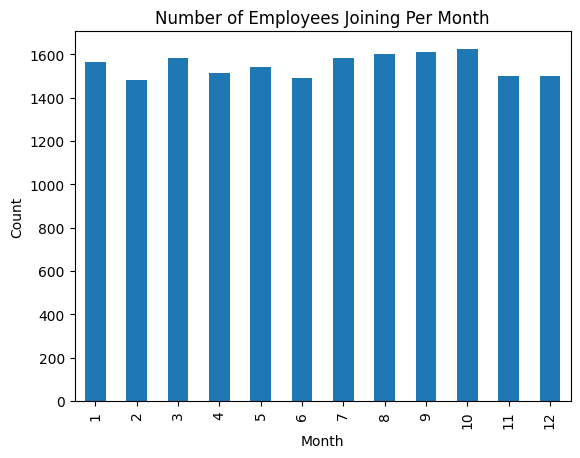

In [18]:
print(f"Min date: {data['Date of Joining'].min()}")
print(f"Max date: {data['Date of Joining'].max()}")

data_month = data.copy()
data_month["Date of Joining"] = data_month['Date of Joining'].astype("datetime64[ns]")  # Specify time unit as nanoseconds

data_month['Date of Joining'].dt.month.value_counts().sort_index().plot(
    kind="bar",
    xlabel="Month",
    ylabel="Count",
    title="Number of Employees Joining Per Month"
)
plt.show()

In [19]:
# Create a reference date for 2008-01-01
data_2008 = pd.to_datetime(["2008-01-01"] * len(data))

# Specify time unit as nanoseconds and calculate the difference in days
data["Days"] = data['Date of Joining'].astype("datetime64[ns]").sub(data_2008).dt.days

# Display the calculated days
data.Days


,Days
0,273
1,334
3,307
4,205
5,330
...,...
22743,349
22744,147
22746,18
22748,9


In [20]:
# Select only numeric columns before calculating correlation
numeric_data = data.select_dtypes(include=["number"])
correlation = numeric_data.corr()["Burn Rate"]
print(correlation)


Designation             0.736412
Resource Allocation     0.855005
Mental Fatigue Score    0.944389
Burn Rate               1.000000
Days                    0.000309
Name: Burn Rate, dtype: float64


In [21]:
data.corr(numeric_only=True)["Burn Rate"][:]

,Burn Rate
Designation,0.736412
Resource Allocation,0.855005
Mental Fatigue Score,0.944389
Burn Rate,1.000000
Days,0.000309


In [22]:
data = data.drop(['Date of Joining', 'Days'], axis=1)


In [23]:
data.head()

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,Female,Service,No,2,3.0,3.8,0.16
1,Male,Service,Yes,1,2.0,5.0,0.36
3,Male,Service,Yes,1,1.0,2.6,0.20
4,Female,Service,No,3,7.0,6.9,0.52
5,Male,Product,Yes,2,4.0,3.6,0.29


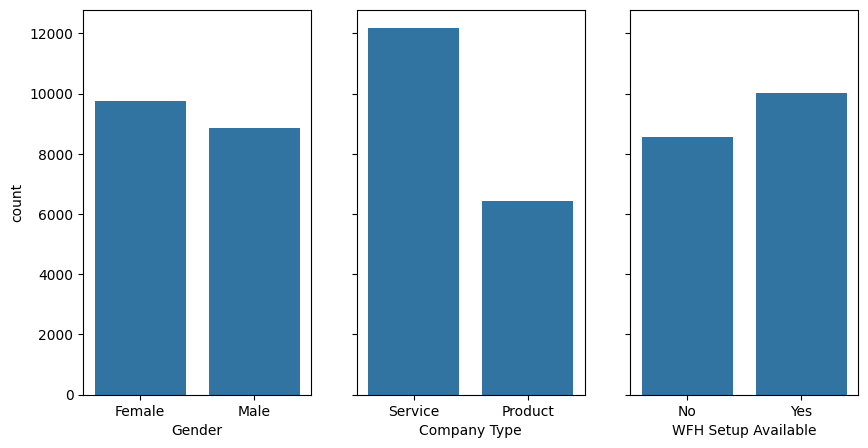

In [24]:
cat_columns = data.select_dtypes(object).columns
fig, ax = plt.subplots(nrows=1, ncols=len(cat_columns), sharey=True, figsize=(10, 5))

for i, c in enumerate(cat_columns):
    sns.countplot(x=c, data=data, ax=ax[i])

plt.show()

The number of observation of each category on each variable is equally distributed, except to the company. Type where the number of service jobs its almost twice that of product ones.

###One-Hot Encoding for categorical features

In [25]:
# Check if the columns exist before applying get_dummies
if all(col in data.columns for col in ['Company Type', 'WFH Setup Available', 'Gender']):
    data = pd.get_dummies(data, columns=['Company Type', 'WFH Setup Available', 'Gender'], drop_first=True)
    print(data.head())  # Display the first few rows of the updated DataFrame
    encoded_columns = data.columns
else:
    print("Error: One or more of the specified columns are not present in the DataFrame.")
    # Add debugging steps here to investigate why the columns are missing.
    # For example, print the existing columns:
    print(data.columns)

   Designation  Resource Allocation  Mental Fatigue Score  Burn Rate  \
0            2                  3.0                   3.8       0.16   
1            1                  2.0                   5.0       0.36   
3            1                  1.0                   2.6       0.20   
4            3                  7.0                   6.9       0.52   
5            2                  4.0                   3.6       0.29   

   Company Type_Service  WFH Setup Available_Yes  Gender_Male  
0                  True                    False        False  
1                  True                     True         True  
3                  True                     True         True  
4                  True                    False        False  
5                 False                     True         True  


In [26]:
data

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Company Type_Service,WFH Setup Available_Yes,Gender_Male
0,2,3.0,3.8,0.16,True,False,False
1,1,2.0,5.0,0.36,True,True,True
3,1,1.0,2.6,0.20,True,True,True
4,3,7.0,6.9,0.52,True,False,False
5,2,4.0,3.6,0.29,False,True,True
...,...,...,...,...,...,...,...
22743,1,3.0,6.0,0.48,False,True,False
22744,3,7.0,6.2,0.54,False,False,True
22746,3,6.0,6.7,0.59,False,True,False
22748,2,5.0,5.9,0.52,True,False,False


# Preprocessing

In [27]:
# Split df into X and y
y = data['Burn Rate']
X = data.drop('Burn Rate', axis=1)  # Corrected the quotes and axis


In [28]:
#Train-test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)  # Corrected train_size value

# Scale X
scaler = StandardScaler()
scaler.fit(X_train)

X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)


In [29]:
X_train

,Designation,Resource Allocation,Mental Fatigue Score,Company Type_Service,WFH Setup Available_Yes,Gender_Male
8977,0.723327,0.250185,-0.061773,0.724706,-1.082297,1.051505
14115,-0.159330,0.250185,-0.941481,0.724706,-1.082297,-0.951018
8797,0.723327,0.250185,0.973179,0.724706,-1.082297,-0.951018
1173,-1.041987,-1.214568,-0.579248,-1.379869,-1.082297,-0.951018
1941,-0.159330,0.738436,1.180169,-1.379869,0.923961,1.051505
...,...,...,...,...,...,...
13453,0.723327,1.226687,1.645897,-1.379869,0.923961,-0.951018
21179,0.723327,0.250185,-1.044976,0.724706,0.923961,1.051505
6327,0.723327,0.250185,0.093470,0.724706,-1.082297,1.051505
14933,-0.159330,0.250185,0.714441,0.724706,-1.082297,1.051505


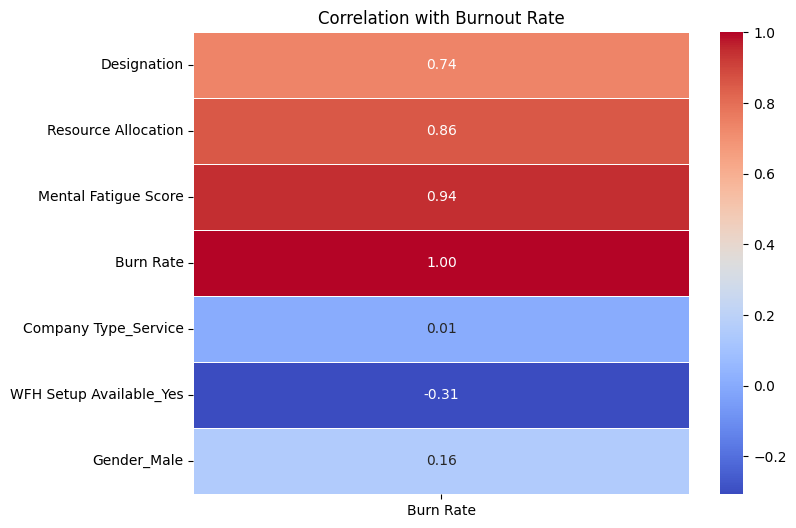

In [40]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Focus on correlations with "BurnoutRate"
burnout_correlations = correlation_matrix[["Burn Rate"]]

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(burnout_correlations, annot=True, cmap="coolwarm", cbar=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation with Burnout Rate")
plt.show()

#Model Building

###Linear Regression

In [30]:
# Create an instance of the LinearRegression class
linear_regression_model = LinearRegression()

# Train the model
linear_regression_model.fit(X_train, y_train)

LinearRegression()

In [37]:
import numpy as np

# Linear Regression Model Performance Metrics
print("Linear Regression Model Performance Metrics:\n")

# Predictions
y_pred = linear_regression_model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print("Root Mean Squared Error:", rmse)

# Calculate mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print ("R-squared Score:", r2)


Linear Regression Model Performance Metrics:

Mean Squared Error: 0.0031569779113610717
Root Mean Squared Error: 0.0561869905882231
Mean Absolute Error: 0.04595032032644773
R-squared Score: 0.918822674247248


Based on this evaluation Metrics, the linear Regression Model appears to the best model for predicting burnout analysis.

It has the lowest mean Squared error, root mean squared error and neab absolute error indicating better accuracy and precision in its predictions. Additionally, it has the Highest R-Squared score, indicating a good fit to the data and explaining a higher proportion of the variance in the target variable.

So we are choosing this model for deployment.